dict_keys(['features', 'coords', 'sizes', 'labels'])
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


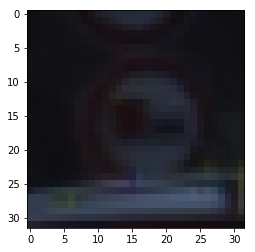

Labels before Shuffling [41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41]
Laels after Shuffling [39  2 35  7  2  3 12  5 26  1 12 13  1  8 33 11 10  7 33 14 36 15 18  3 13]
count [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
39
printing done!!!


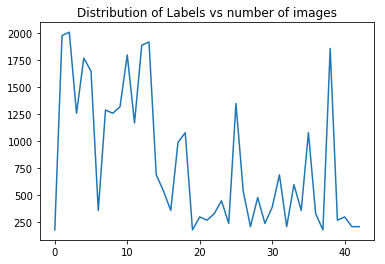

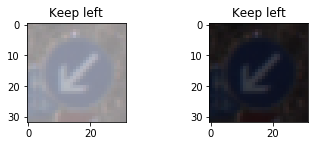

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
import random

# Load pickled data
# Pickle is used to serialize the data so that it can be saved to a disk

training_file = './data/train.p'
validation_file = './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

#Each pickled dataset is a dictionary of 4 keys
#dict_keys(['sizes', 'labels', 'features', 'coords'])
print(train.keys())

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


####################################################################################################################
LEARN_RATE = 0.001
BATCH_SIZE = 256
EPOCHS = 3

#Number of labels should be same as number of input images
assert(len(X_train) == len(y_train))
n_train = len(X_train)

assert(len(X_valid) == len(y_valid))
n_valid = len(X_valid)

assert(len(X_test) == len(y_test))
n_test = len(X_test)

# Image Shape
image_shape = X_train[0].shape

# Number of classes / labels
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

####################################################################################################################

def readcsv(file):
    with open(file) as csvfile:
        reader = csv.DictReader(csvfile)
        label_dict = {row['ClassId']:row['SignName'] for row in reader}
        return label_dict

# Visualizations will be shown in the notebook using this command
%matplotlib inline
plt.imshow(X_train[random.randint(0, n_train)])
plt.show()

#Number of occurances of types of images in training set
count, label = np.unique(y_train, return_counts=True)
label_dict = readcsv('signnames.csv')
# for i, j in zip(count, label):
#     print('{} :: {}'.format(label_dict[repr(i)], j))

def get_label_name(label_no):
    return label_dict[label_no]


####################################################################################################################

#Images are in order, so shuffle them
print('Labels before Shuffling', y_train[:25])

X_train_shuffle, y_train_shuffle = shuffle(X_train, y_train)
print('Laels after Shuffling', y_train_shuffle[:25])

#To check if the count has changed after shuffling, which ideally shouldn't
label, count = np.unique(y_train_shuffle, return_counts=True)
print('count',count)
label_dict_shuffle = readcsv('signnames.csv')
#print('\nLabels vs Count to ensure this pair doesn\'t change post shuffling\n')
count_var = []
for i, j in zip(count, label):
    #print('{} :: {}'.format(label_dict_shuffle[repr(j)], i))
    count_var.append(i)

plt.plot(count_var)
plt.title('Distribution of Labels vs number of images')

    

####################################################################################################################
# PRE PROCESSING DATA - SHUFFLE, NORMALIZATION
X_train_shuffle_normalized = (X_train_shuffle - 127.5) / 255

#No change in shape due to normalization
#print('Orignal Shape of the Image {} \nShape after normalization {}'.format(X_train[0].shape, \
#                                                                            X_train_shuffle_normalized[0].shape))

#Mean value after normalization
#X_train_shuffle_mean = np.mean(X_train_shuffle_normalized)

#print('Original Mean {} \nNormalized Mean {}'.format(np.mean(X_train_shuffle), X_train_shuffle_mean))

#TODO - Loop through and display 10 images


# for i in range(10):
#     plt.figure(3)
#     plt.subplot(5,2,i+1)
#     img_name = get_label_name(repr(y_train_shuffle[i]))
#     plt.title(img_name)
#     plt.imshow(X_train_shuffle_normalized[i])

#Assigning back to original input variables after pre-processing
X_train, y_train = X_train_shuffle_normalized, y_train_shuffle
plt.figure(4)
plt.subplot(221)
print(y_train[0])
name = get_label_name(repr(y_train[0]))
plt.title(name)
plt.imshow(X_train[0])
plt.subplot(222)
plt.title(name)
plt.imshow(X_train_shuffle[0])
print('printing done!!!')